Criando um histograma de distribuição de rende com 1 bilionário de outlier:

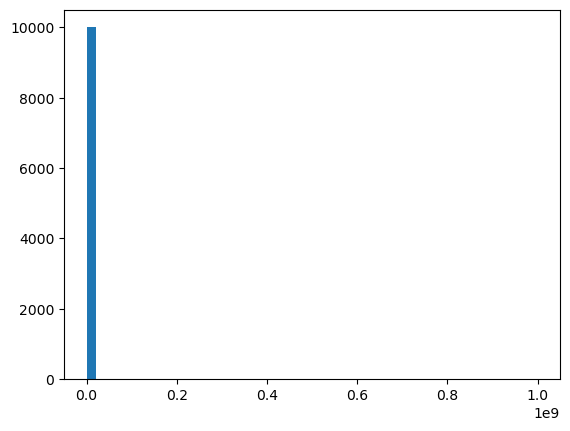

In [29]:
%matplotlib inline
import numpy as np

incomes = np.random.normal(27000, 15000, 10000) #cria um conjunto de 10000 inteiros com dist normal, média 27000, desv padrao 15000
incomes = np.append(incomes, [1000000000]) #adiciona um bilionario

import matplotlib.pyplot as plt
plt.hist(incomes, 50) #cria um histograma dos dados de incomes com 50 barras
plt.show() #plota o histograma

Como pode-se observar, o ponto que representa o biolionário fez com que os dados das pessoas de renda "comum" ficassem concentrados à esquerda. Ou seja, a presença desse ponto discrepante gera um problema na visualização dos dados.

In [30]:
incomes.mean()

126790.6825197223

Essa distorção também pode ser observada na métrica de média, que antes era ~27000 e, com a adição de apenas 1 ponto, foi para ~127000.

Caso o objetivo aqui seja analisar a rende de "cidadãos comuns", é interessante remover pontos discrepantes como bilionários. Porém, é preferível a escolha de um critério mais robusto e abrangente ao invés da remoção manual de "bilionários" ou "milionários". Neste caso, será considerado um outlier (e retirado do conjunto) qualquer um que esteja além de 2 desvios padrões da média:

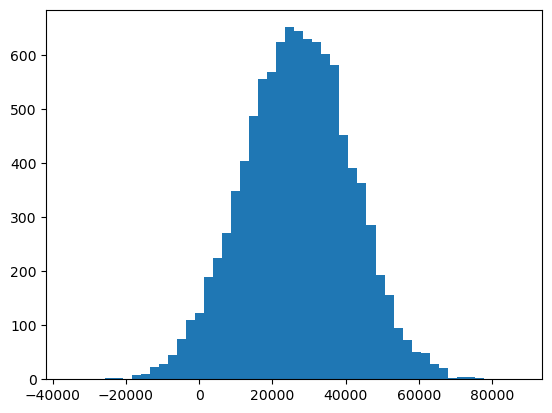

In [32]:
def reject_outliers(data): #recebe um array com um conjunto de dados
    u = np.median(data) #computa a média do conjunto
    s = np.std(data) #computa o desvio padrão do conjunto
    filtered = [e for e in data if (u - 2*s < e < u +2*s)]
    #utiliza list comprehension para selecionar de data apenas aqueles pontos que não desviam da média em mais de 2 desv padroes
    return filtered #retorna o novo conjunto sem os outliers

filtered = reject_outliers(incomes)

plt.hist(filtered, 50) #cria um histograma de 50 barras com os dados de data filtrados
plt.show()

Agora, sem os outliers, temos o resultados esperado: uma curva normal.

In [33]:
np.mean(filtered)

26803.36158797426

A média também fica muito mais próxima do esperado de ~27000.